## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:175%; text-align:center; border-radius:10px 10px;">Dataset Info</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

The Census Income dataset has 48,842 entries. Each entry contains the following information about an individual:

- **salary (target feature/label):** whether or not an individual makes more than $50,000 annually. (<= 50K, >50K)
- **age:** the age of an individual. (Integer greater than 0)
- **workclass:** a general term to represent the employment status of an individual. (Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked)
- **fnlwgt:** this is the number of people the census believes the entry represents. People with similar demographic characteristics should have similar weights.  There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.(Integer greater than 0)
- **education:** the highest level of education achieved by an individual. (Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.)
- **education-num:** the highest level of education achieved in numerical form. (Integer greater than 0)
- **marital-status:** marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces. Married-spouse-absent includes married people living apart because either the husband or wife was employed and living at a considerable distance from home (Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)
- **occupation:** the general type of occupation of an individual. (Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)
- **relationship:** represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute. (Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)
- **race:** Descriptions of an individual’s race. (White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)
- **sex:** the biological sex of the individual. (Male, female)
- **capital-gain:** capital gains for an individual. (Integer greater than or equal to 0)
- **capital-loss:** capital loss for an individual. (Integer greater than or equal to 0)
- **hours-per-week:** the hours an individual has reported to work per week. (continuous)
- **native-country:** country of origin for an individual (United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands)

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

plt.rcParams["figure.figsize"]=(10,6)
sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: '%.2f'  %x)

pd.options.display.max_rows=50 
pd.options.display.max_columns=100

import warnings
warnings.filterwarnings("ignore")
warnings.warn("thisnwill not show")

## Read data from file

In [75]:
#Let's start by reading data 
df = pd.read_csv("adult_eda.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.00,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.00,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.00,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.00,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


## Try to understand what the data looks like? What are types of the features? Are there any missing values? Do I need to eliminate some features?

In [76]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [77]:
df.shape

(32561, 15)

In [78]:
df.info

<bound method DataFrame.info of        age         workclass  fnlwgt   education  education-num  \
0       39         State-gov   77516   Bachelors          13.00   
1       50  Self-emp-not-inc   83311   Bachelors          13.00   
2       38           Private  215646     HS-grad           9.00   
3       53           Private  234721        11th           7.00   
4       28           Private  338409   Bachelors          13.00   
...    ...               ...     ...         ...            ...   
32556   27           Private  257302  Assoc-acdm          12.00   
32557   40           Private  154374     HS-grad           9.00   
32558   58           Private  151910     HS-grad           9.00   
32559   22           Private  201490     HS-grad           9.00   
32560   52      Self-emp-inc  287927     HS-grad           9.00   

           marital-status         occupation   relationship   race     sex  \
0           Never-married       Adm-clerical  Not-in-family  White    Male   
1      

In [79]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.00,38.58,13.64,17.00,28.00,37.00,48.00,90.00
fnlwgt,32561.00,189778.37,105549.98,12285.00,117827.00,178356.00,237051.00,1484705.00
education-num,31759.00,10.08,2.58,1.00,9.00,10.00,12.00,16.00
capital-gain,32561.00,1077.65,7385.29,0.00,0.00,0.00,0.00,99999.00
capital-loss,32561.00,87.30,402.96,0.00,0.00,0.00,0.00,4356.00
hours-per-week,32561.00,40.44,12.35,1.00,40.00,40.00,45.00,99.00


In [80]:
df.isna()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [81]:
df.isna().sum()

age                  0
workclass            0
fnlwgt               0
education            0
education-num      802
marital-status       0
occupation           0
relationship      5068
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country       0
salary               0
dtype: int64

In [82]:
df.isna().sum()[df.isna().sum() > 0]

education-num     802
relationship     5068
dtype: int64

## Look at the value counts of columns that have object datatype and replace '?' like values with 'Unknown' word.

In [83]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [84]:
df.select_dtypes(include="object")

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,NaN,White,Male,United-States,<=50K


In [85]:
df.select_dtypes(include="object").describe()

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
count,32561,32561,32561,32561,27493,32561,32561,32561,32561
unique,9,16,7,15,5,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [86]:
df.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [87]:
df["workclass"].value_counts() 

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [88]:
for col in df.select_dtypes(include="object"):
    print(col)
    print("***")
    print(df[col].value_counts())
    print("*****************************")

workclass
***
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64
*****************************
education
***
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64
*****************************
marital-status
***
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: i

In [89]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation         True
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country     True
salary            False
dtype: bool

In [90]:
df.workclass.replace("?", "Unknown")

0               State-gov
1        Self-emp-not-inc
2                 Private
3                 Private
4                 Private
               ...       
32556             Private
32557             Private
32558             Private
32559             Private
32560        Self-emp-inc
Name: workclass, Length: 32561, dtype: object

In [91]:
df.replace({"?":"Unknown","!":"aa"}) ## Bu formatta birden fazla deger degisimi icin kullanilir.

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13.00,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13.00,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9.00,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7.00,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13.00,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12.00,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9.00,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9.00,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9.00,Never-married,Adm-clerical,NaN,White,Male,0,0,20,United-States,<=50K


## Do education and education_num columns hold similar information? If so drop the appropriate choice between them.

In [92]:
df.education.value_counts(dropna=False)

HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

In [93]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [94]:
df["education-num"].value_counts(dropna=False)

9.00     10215
10.00     7098
13.00     5247
14.00     1687
11.00     1343
7.00      1146
12.00     1044
6.00       916
NaN        802
4.00       631
15.00      559
5.00       503
8.00       424
16.00      405
3.00       330
2.00       161
1.00        50
Name: education-num, dtype: int64

In [95]:
df.groupby("education")["education-num"].value_counts(dropna=False)

education     education-num
10th          6.00               916
              NaN                 17
11th          7.00              1146
              NaN                 29
12th          8.00               424
              NaN                  9
1st-4th       2.00               161
              NaN                  7
5th-6th       3.00               330
              NaN                  3
7th-8th       4.00               631
              NaN                 15
9th           5.00               503
              NaN                 11
Assoc-acdm    12.00             1044
              NaN                 23
Assoc-voc     11.00             1343
              NaN                 39
Bachelors     13.00             5247
              NaN                108
Doctorate     16.00              405
              NaN                  8
HS-grad       9.00             10215
              NaN                286
Masters       14.00             1687
              NaN                 36
Preschool 

In [96]:
df.drop("education-num", axis=1, inplace=True)

In [97]:
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Impute missing value in relationship column with "Unmaried". Also replace "Not-in-family", "Other-relative" values in this column with "Unmaried"?

In [99]:
df.relationship.value_counts(dropna=False)

Husband           13193
Not-in-family      8305
NaN                5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [101]:
df["marital-status"].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital-status, dtype: int64

In [102]:
df.groupby("relationship")["marital-status"].value_counts()

relationship    marital-status       
Husband         Married-civ-spouse       13184
                Married-AF-spouse            9
Not-in-family   Never-married             4706
                Divorced                  2404
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Unmarried       Divorced                  1601
                Never-married              881
                Separated                  451
                Widowed                    383
                Married-spouse-absent      130
Wife            Marrie

In [107]:
df.relationship = df.relationship.replace(["Not-in-family","Other-relative",np.nan],"Unmarried")

In [108]:
df.relationship.value_counts()

Unmarried    17800
Husband      13193
Wife          1568
Name: relationship, dtype: int64

In [110]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

## Look at the corr between variables

In [111]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
age,1.00,-0.08,0.08,0.06,0.07
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02
capital-gain,0.08,0.00,1.00,-0.03,0.08
capital-loss,0.06,-0.01,-0.03,1.00,0.05
hours-per-week,0.07,-0.02,0.08,0.05,1.00


In [112]:
df.salary.value_counts()

<=50K    24720
>50K      7841
Name: salary, dtype: int64

In [120]:
df.salary.replace({"<=50K":0,">50K":1}, inplace=True)

In [121]:
df.salary.value_counts()

0    24720
1     7841
Name: salary, dtype: int64

In [123]:
df.corr()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week,salary
age,1.00,-0.08,0.08,0.06,0.07,0.23
fnlwgt,-0.08,1.00,0.00,-0.01,-0.02,-0.01
capital-gain,0.08,0.00,1.00,-0.03,0.08,0.22
capital-loss,0.06,-0.01,-0.03,1.00,0.05,0.15
hours-per-week,0.07,-0.02,0.08,0.05,1.00,0.23
salary,0.23,-0.01,0.22,0.15,0.23,1.00


<AxesSubplot:>

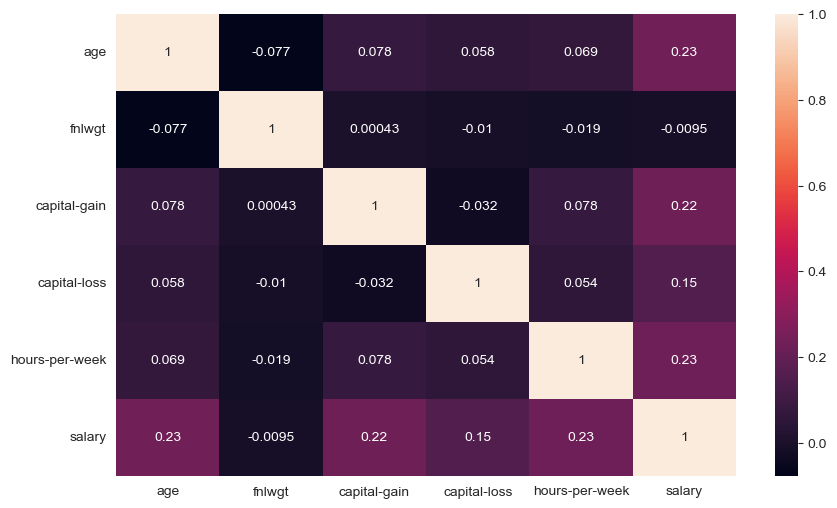

In [125]:
sns.heatmap(data=df.corr(), annot=True)

## find outlier values which extends the upper limit in both age and hours-per-week columns

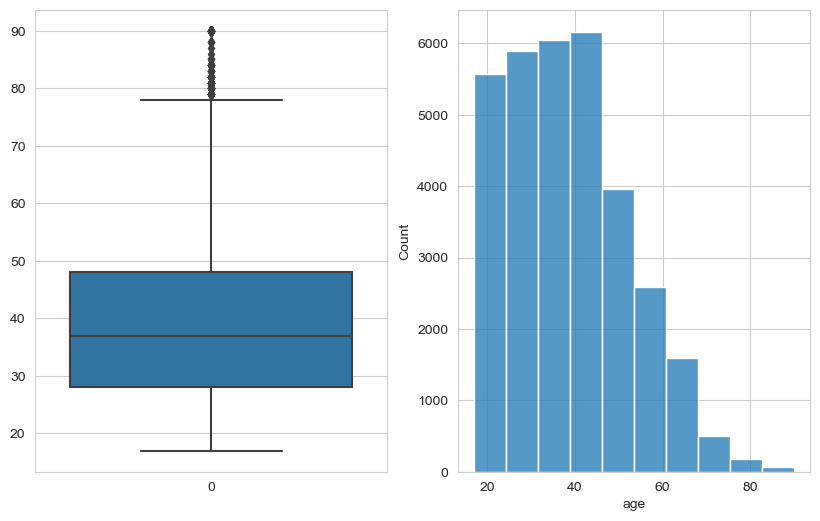

In [131]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df.age,whis=1.5)

plt.subplot(1,2,2)
sns.histplot(data=df.age, bins=10);

# Middle line represents Q2 and median, upper line is Q3 and below line represents the Q1.

In [132]:
q1 = df.age.quantile(0.25)
q1

28.0

In [133]:
q3 = df.age.quantile(0.75)
q3

48.0

In [135]:
iqr = q3-q1
iqr

20.0

In [145]:
low_limit = q1 - (iqr * 1.5)
low_limit

# we will have to ignore low limit.

-2.0

In [140]:
upper_limit = q3 + (iqr * 1.5)
upper_limit

78.0

In [146]:
df[df.age>78]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
74,79,Private,124744,Some-college,Married-civ-spouse,Prof-specialty,Unmarried,White,Male,0,0,20,United-States,0
222,90,Private,51744,HS-grad,Never-married,Other-service,Unmarried,Black,Male,0,2206,40,United-States,0
430,80,?,107762,HS-grad,Widowed,?,Unmarried,White,Male,0,0,24,United-States,0
918,81,Self-emp-not-inc,136063,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,30,United-States,0
1040,90,Private,137018,HS-grad,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32277,90,Private,313749,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,25,United-States,0
32367,90,Local-gov,214594,7th-8th,Married-civ-spouse,Protective-serv,Husband,White,Male,2653,0,40,United-States,0
32459,85,Private,98611,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,3,Poland,0
32494,82,?,403910,HS-grad,Never-married,?,Unmarried,White,Male,0,0,3,United-States,0


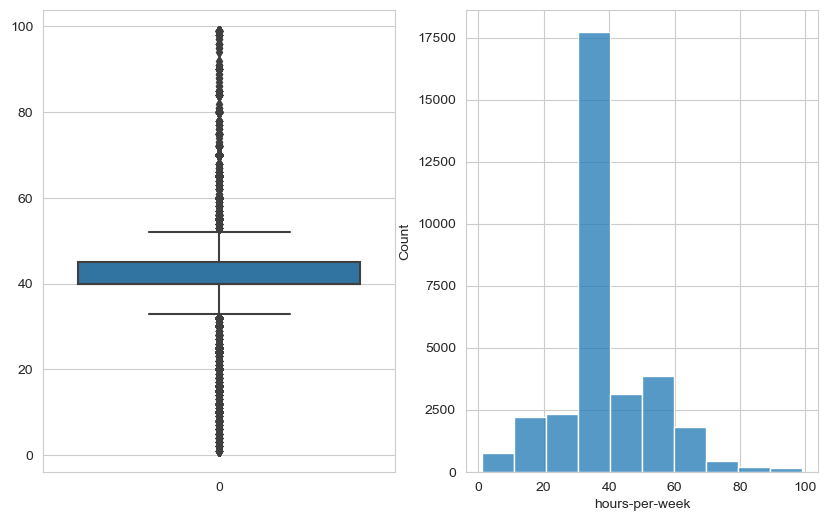

In [147]:
plt.figure(figsize=(10,6))

plt.subplot(1,2,1)
sns.boxplot(data=df["hours-per-week"])

plt.subplot(1,2,2)
sns.histplot(data=df["hours-per-week"],bins=10);

In [148]:
hq1 = df["hours-per-week"].quantile(0.25)
hq1

40.0

In [149]:
hq2 = df["hours-per-week"].quantile(0.50)
hq2

40.0

In [151]:
df[(df["hours-per-week"] < 32.5) | (df["hours-per-week"] > 52.5)]

#9000/32000 approx 25% does not make sense to delete

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Unmarried,Black,Female,0,0,16,Jamaica,0
10,37,Private,280464,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,1
12,23,Private,122272,Bachelors,Never-married,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,0
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32545,39,Local-gov,111499,Assoc-acdm,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,1
32548,65,Self-emp-not-inc,99359,Prof-school,Never-married,Prof-specialty,Unmarried,White,Male,1086,0,60,United-States,0
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [152]:
df[df["hours-per-week"]==99]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
935,37,Private,176900,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,99,United-States,1
1172,25,Private,404616,Masters,Married-civ-spouse,Farming-fishing,Unmarried,White,Male,0,0,99,United-States,1
1887,55,Self-emp-not-inc,184425,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,1
3578,37,Self-emp-inc,382802,Doctorate,Married-civ-spouse,Prof-specialty,Husband,Black,Male,0,0,99,United-States,1
4086,50,?,174964,10th,Married-civ-spouse,?,Husband,White,Male,0,0,99,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30992,40,Self-emp-inc,104235,Masters,Never-married,Other-service,Unmarried,White,Male,0,0,99,United-States,0
31681,43,Private,266324,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,0,1902,99,United-States,1
31699,43,Self-emp-not-inc,163108,Some-college,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,99,United-States,0
32469,58,Self-emp-inc,181974,Doctorate,Never-married,Prof-specialty,Unmarried,White,Female,0,0,99,?,0


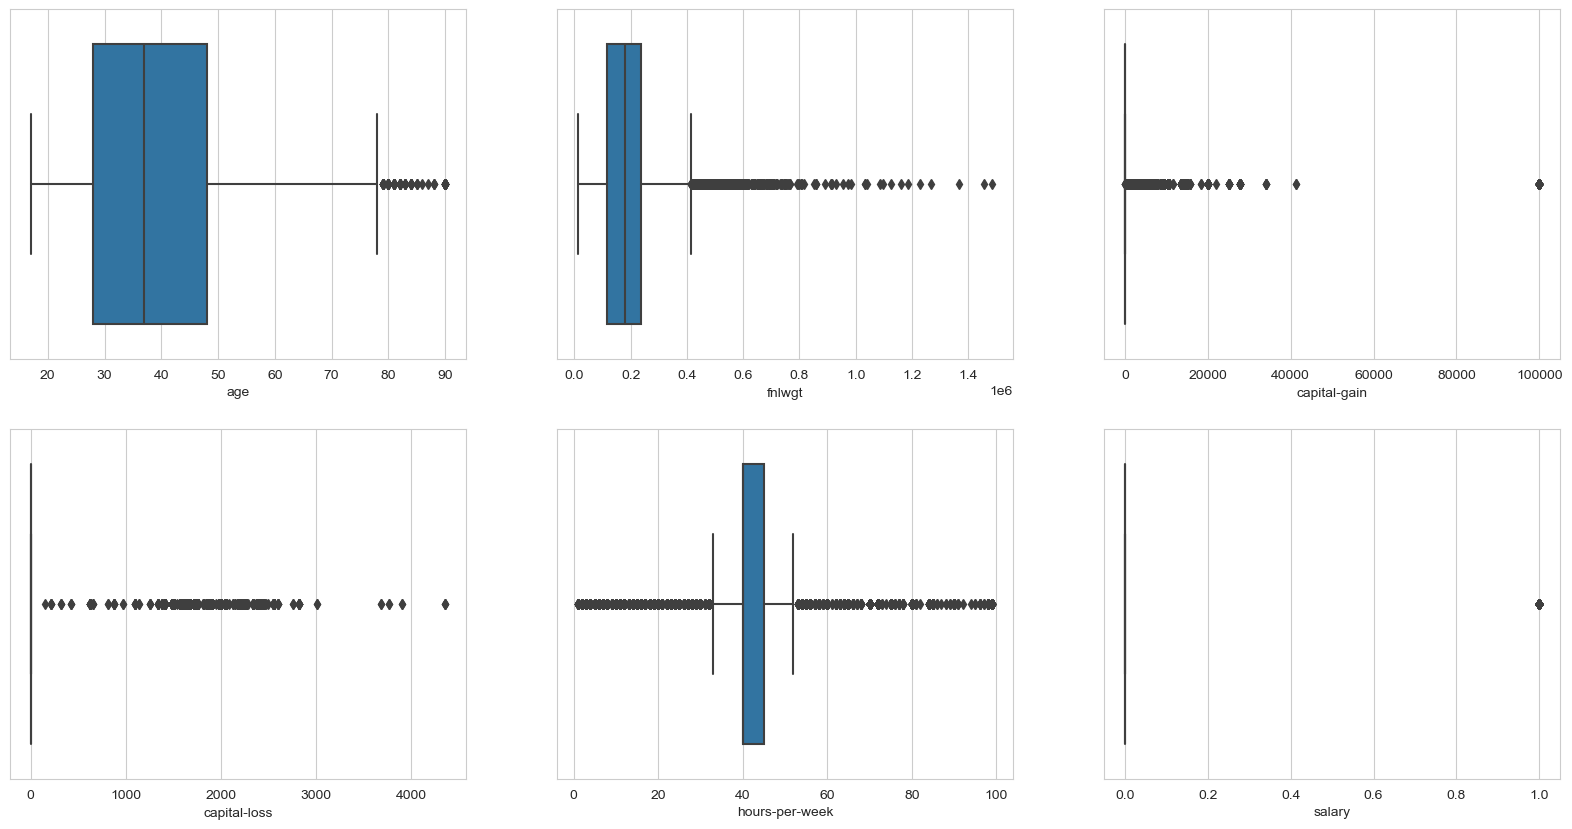

In [153]:
index=0

plt.figure(figsize=(20,10))

for feature in df.select_dtypes('number').columns:
    index+=1
    plt.subplot(2,3,index)
    sns.boxplot(x=feature,data=df,whis=1.5)

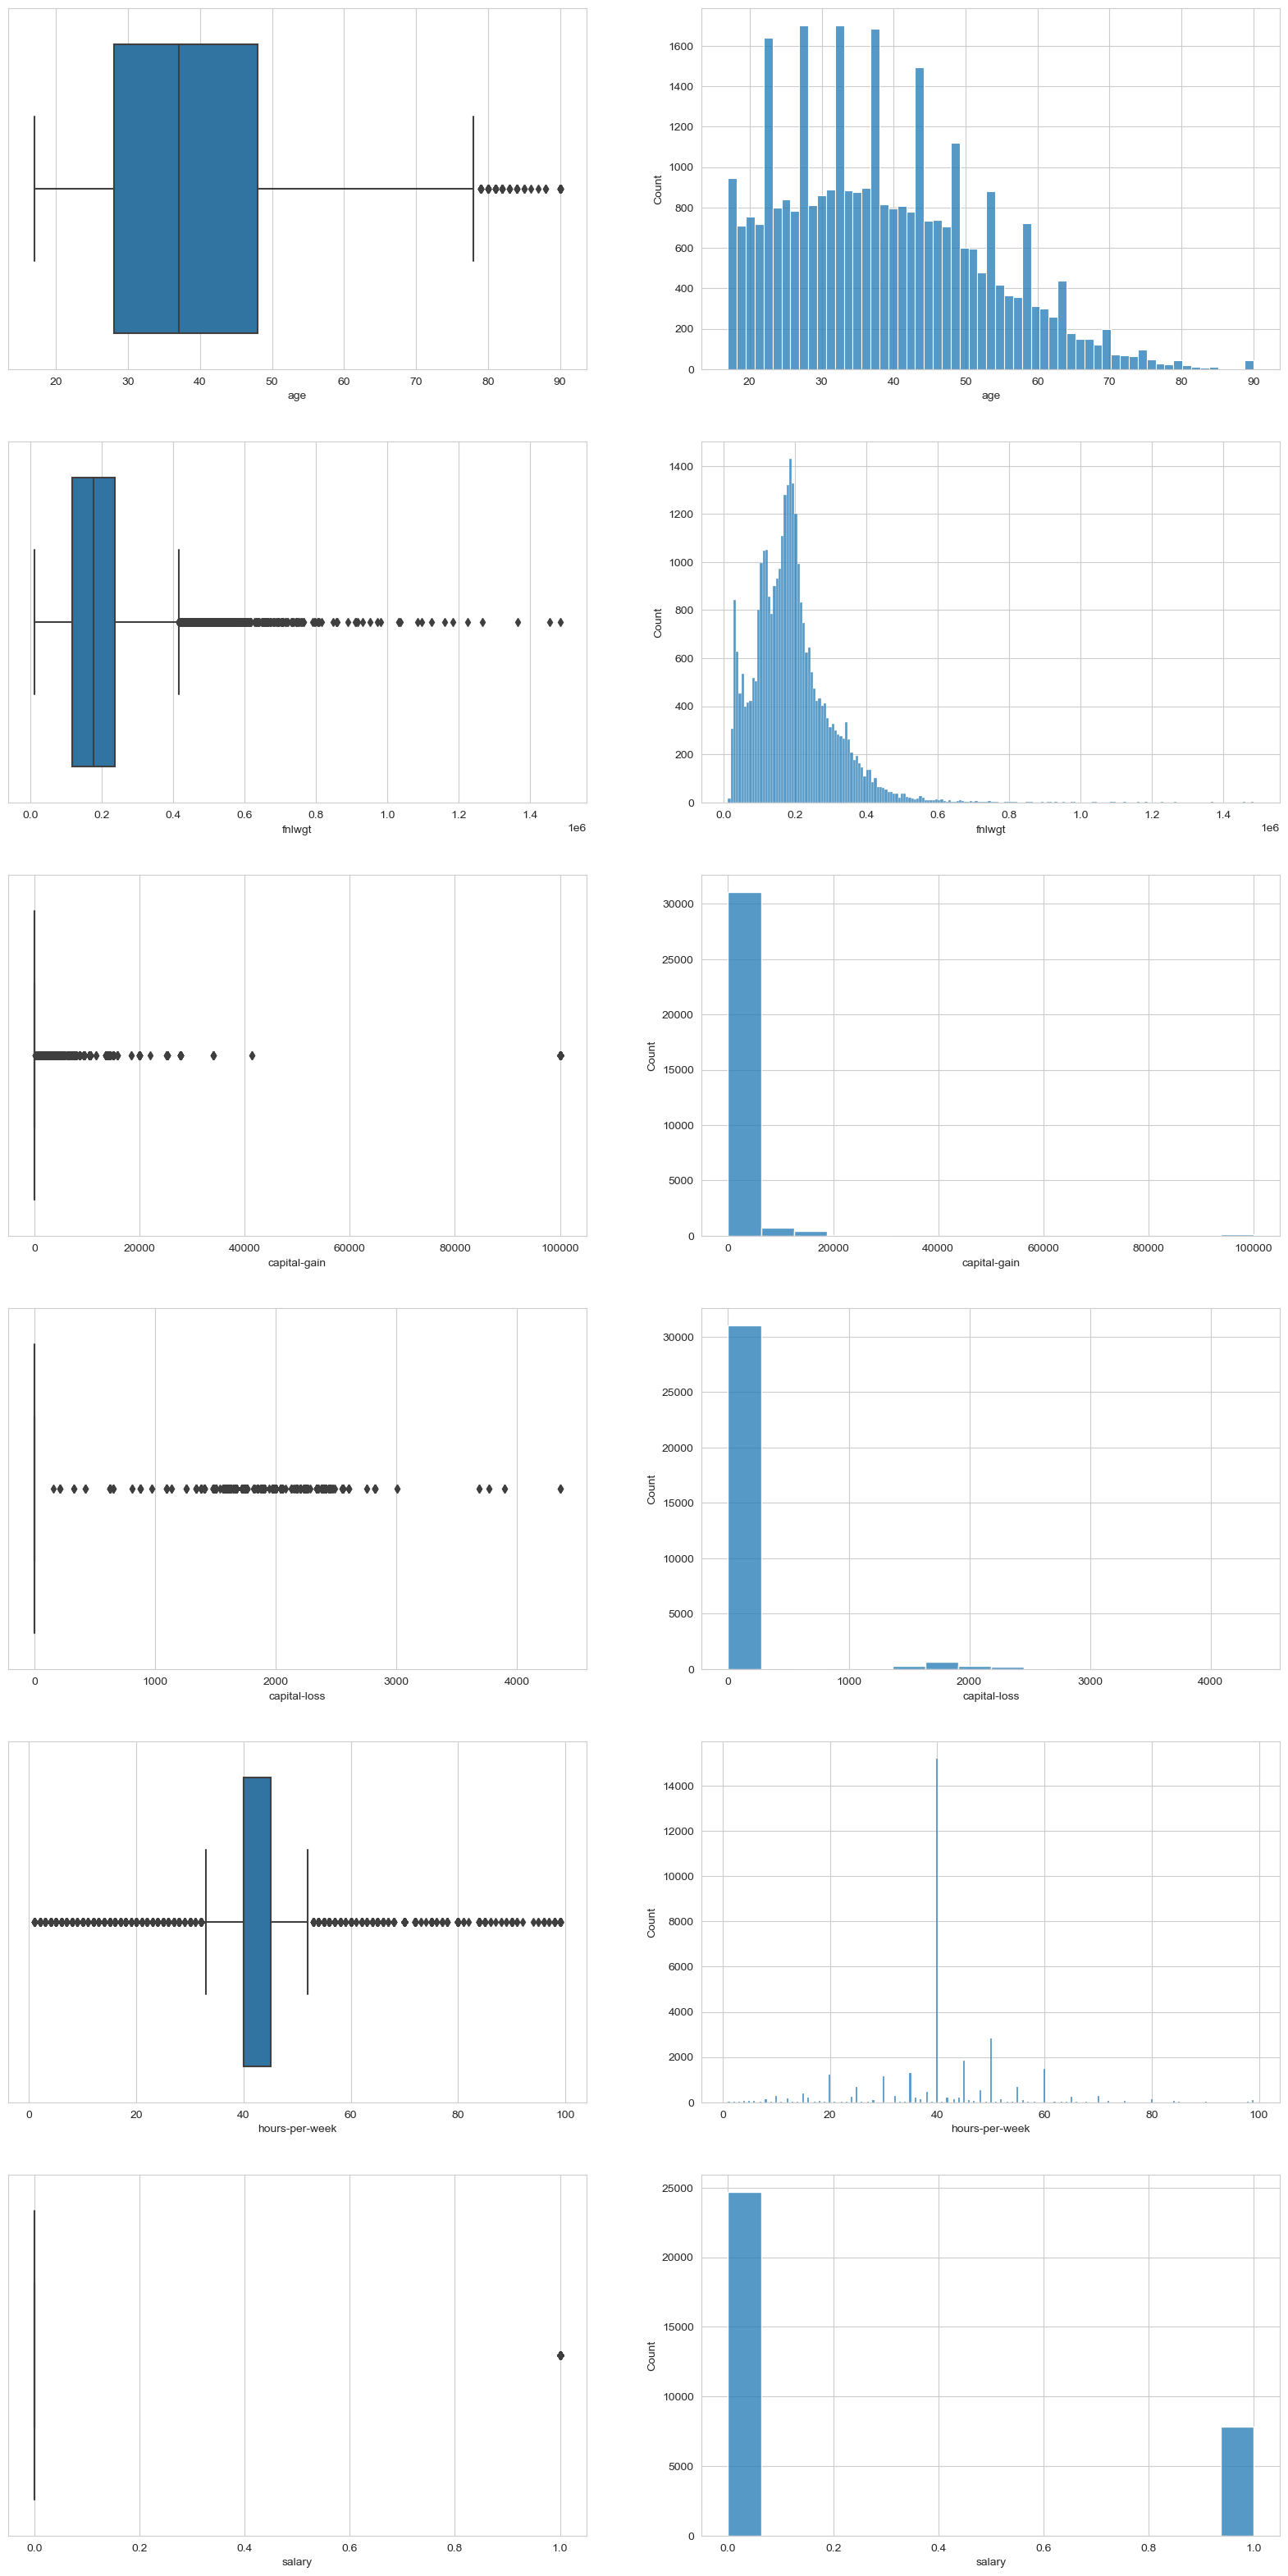

In [154]:
index=0

plt.figure(figsize=(20,40))

for feature in df.select_dtypes('number').columns:
    
    index+=1
    plt.subplot(6,2,index)
    sns.boxplot(x=feature,data=df,whis=1.5) 
    
    index+=1
    plt.subplot(6,2,index)
    sns.histplot(x=feature,data=df) 

## After looking at the outliers you can drop the rows which actually does not make any sense.

In [163]:
df[(df.age > 78)  & (df["hours-per-week"] > 52.5)]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
3777,80,Private,87518,Some-college,Never-married,Prof-specialty,Unmarried,White,Male,0,1816,60,United-States,0
5370,90,Local-gov,227796,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,20051,0,60,United-States,1
7481,83,Private,195507,HS-grad,Widowed,Protective-serv,Unmarried,White,Male,0,0,55,United-States,0
7720,84,Private,241065,Masters,Never-married,Prof-specialty,Unmarried,White,Male,0,0,66,United-States,0
8806,90,Private,87372,Prof-school,Married-civ-spouse,Prof-specialty,Husband,White,Male,20051,0,72,United-States,1
11996,90,Private,40388,Bachelors,Never-married,Exec-managerial,Unmarried,White,Male,0,0,55,United-States,0
12830,81,Private,201398,Masters,Widowed,Prof-specialty,Unmarried,White,Male,0,0,60,?,0
15356,90,Private,90523,HS-grad,Widowed,Transport-moving,Unmarried,White,Male,0,0,99,United-States,0
24395,83,Self-emp-inc,153183,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,2392,55,United-States,1


In [164]:
drop_index = df[(df.age > 78)  & (df["hours-per-week"] > 52.5)].index
drop_index

Int64Index([3777, 5370, 7481, 7720, 8806, 11996, 12830, 15356, 24395], dtype='int64')

In [165]:
df.drop(index = drop_index, inplace= True )

In [166]:
drop_index_1 = df[(df.age > 65)  & (df["hours-per-week"] == 99)].index
drop_index_1

Int64Index([9831, 16604, 19997, 23398, 26858], dtype='int64')

In [167]:
df.drop(index = drop_index_1, inplace= True )

## How many of each race are represented in this dataset?

In [171]:
df.race.value_counts()

White                 27802
Black                  3124
Asian-Pac-Islander     1039
Amer-Indian-Eskimo      311
Other                   271
Name: race, dtype: int64

## What is the average age of men/women?

In [174]:
df.sex.value_counts()

Male      21777
Female    10770
Name: sex, dtype: int64

In [197]:
average_women = df[df.sex == "Female"]["age"].mean()
average_women

36.854967502321266

In [199]:
df.groupby("sex")["age"].mean()

sex
Female   36.85
Male     39.41
Name: age, dtype: float64

## What is the percentage of people who have a Bachelor's degree?

In [200]:
count_bachelors = df[df.education == "Bachelors"].shape[0]
count_bachelors

5351

In [201]:
percentage_bachelors = (count_bachelors / df.shape[0]) * 100
percentage_bachelors

16.440839401480936

In [202]:
print(f"The percentage of people who have a Bachelor's degree : %{round(percentage_bachelors,1)}")

The percentage of people who have a Bachelor's degree : %16.4


In [205]:
## One another way 

In [203]:
df.education.value_counts(normalize=True)["Bachelors"] * 100

16.440839401480936

## What percentage of people with advanced education (Bachelors, Masters, or Doctorate) make more than 50K?

In [206]:
advance_edu = df[(df.education == "Bachelors") | (df.education == "Masters") | (df.education == "Doctorate")]
advance_edu

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [207]:
df[df.education.isin(["Bachelors", "Masters", "Doctorate"])]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0
32553,32,Private,116138,Masters,Never-married,Tech-support,Unmarried,Asian-Pac-Islander,Male,0,0,11,Taiwan,0


In [208]:
advance_edu[advance_edu["salary"] == 0]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Unmarried,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,0
12,23,Private,122272,Bachelors,Never-married,Adm-clerical,Unmarried,White,Female,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32507,50,Private,302372,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,0
32511,25,Local-gov,514716,Bachelors,Never-married,Adm-clerical,Unmarried,Black,Female,0,0,40,United-States,0
32531,30,?,33811,Bachelors,Never-married,?,Unmarried,Asian-Pac-Islander,Female,0,0,99,United-States,0
32544,31,Private,199655,Masters,Divorced,Other-service,Unmarried,Other,Female,0,0,30,United-States,0


In [209]:
advance_edu[advance_edu["salary"] == 1]

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
8,31,Private,45781,Masters,Never-married,Prof-specialty,Unmarried,White,Female,14084,0,50,United-States,1
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,1
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
19,43,Self-emp-not-inc,292175,Masters,Divorced,Exec-managerial,Unmarried,White,Female,0,0,45,United-States,1
20,40,Private,193524,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,60,United-States,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,54,Private,337992,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,50,Japan,1
32536,34,Private,160216,Bachelors,Never-married,Exec-managerial,Unmarried,White,Female,0,0,55,United-States,1
32538,38,Private,139180,Bachelors,Divorced,Prof-specialty,Unmarried,Black,Female,15020,0,45,United-States,1
32539,71,?,287372,Doctorate,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,1


In [210]:
(advance_edu[advance_edu["salary"] == 1].shape[0] / advance_edu.shape[0]) * 100

46.558866764666575

In [211]:
advance_edu.salary.value_counts(normalize=True)

0   0.53
1   0.47
Name: salary, dtype: float64

In [216]:
not_advance_edu = df[~df.education.isin(["Bachelors", "Masters", "Doctorate"])] # Tilda symbol gives us except these values.

In [217]:
not_advance_edu.salary.value_counts(normalize=True)[1] * 100

17.367539099904246

In [218]:
##working Hour is equal to min working hour and salary is bigger than 50k

In [213]:
min_hours = df[df["hours-per-week"] == df["hours-per-week"].min()]
min_hours

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
1036,66,Self-emp-inc,150726,9th,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,0
1262,69,?,195779,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5590,78,?,363134,HS-grad,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5632,45,?,189564,Masters,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5766,62,?,97231,Some-college,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5808,76,?,211574,10th,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,0
8447,67,?,244122,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
9147,75,?,260543,10th,Widowed,?,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,0
11451,27,Private,147951,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,0


In [ ]:
min_hours 

## What country has the highest percentage of people that earn >50K

In [221]:
min_hours = df[df["hours-per-week"] == df["hours-per-week"].min()]
min_hours

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
189,58,State-gov,109567,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,1,United-States,1
1036,66,Self-emp-inc,150726,9th,Married-civ-spouse,Exec-managerial,Husband,White,Male,1409,0,1,?,0
1262,69,?,195779,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5590,78,?,363134,HS-grad,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
5632,45,?,189564,Masters,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5766,62,?,97231,Some-college,Married-civ-spouse,?,Wife,White,Female,0,0,1,United-States,0
5808,76,?,211574,10th,Married-civ-spouse,?,Husband,White,Male,0,0,1,United-States,0
8447,67,?,244122,Assoc-voc,Widowed,?,Unmarried,White,Female,0,0,1,United-States,0
9147,75,?,260543,10th,Widowed,?,Unmarried,Asian-Pac-Islander,Female,0,0,1,China,0
11451,27,Private,147951,HS-grad,Never-married,Machine-op-inspct,Unmarried,White,Male,0,0,1,United-States,0


In [224]:
min_hours.shape

(20, 14)

In [227]:
min_hours.salary.value_counts(normalize=True)[1]*100

10.0

## What country has the highest percentage of people that earn >50K

In [222]:
df.groupby("native-country")["salary"].count()

native-country
?                               581
Cambodia                         19
Canada                          121
China                            75
Columbia                         59
Cuba                             95
Dominican-Republic               70
Ecuador                          28
El-Salvador                     106
England                          90
France                           29
Germany                         137
Greece                           29
Guatemala                        64
Haiti                            44
Holand-Netherlands                1
Honduras                         13
Hong                             20
Hungary                          13
India                           100
Iran                             43
Ireland                          24
Italy                            73
Jamaica                          81
Japan                            62
Laos                             18
Mexico                          643
Nicaragua    

In [223]:
df[df.salary == 1].groupby("native-country")["salary"].count() / df.groupby("native-country")["salary"].count()

native-country
?                            0.25
Cambodia                     0.37
Canada                       0.32
China                        0.27
Columbia                     0.03
Cuba                         0.26
Dominican-Republic           0.03
Ecuador                      0.14
El-Salvador                  0.08
England                      0.33
France                       0.41
Germany                      0.32
Greece                       0.28
Guatemala                    0.05
Haiti                        0.09
Holand-Netherlands            NaN
Honduras                     0.08
Hong                         0.30
Hungary                      0.23
India                        0.40
Iran                         0.42
Ireland                      0.21
Italy                        0.34
Jamaica                      0.12
Japan                        0.39
Laos                         0.11
Mexico                       0.05
Nicaragua                    0.06
Outlying-US(Guam-USVI-etc)    NaN

In [228]:
(df[df.salary == 1].groupby("native-country")["salary"].count() / df.groupby("native-country")["salary"].count()).nlargest(1)

native-country
Iran   0.42
Name: salary, dtype: float64

In [229]:
percentage_country = (df[df.salary == 1].groupby("native-country")[["salary"]].count() / df.groupby("native-country")[["salary"]].count()).sort_values("salary", ascending=False)
percentage_country

,salary
native-country,
Iran,0.42
France,0.41
India,0.40
Taiwan,0.39
Japan,0.39
Yugoslavia,0.38
Cambodia,0.37
Italy,0.34
England,0.33


In [230]:
(df[df.salary == 1].groupby("native-country")["salary"].count() / df.groupby("native-country")["salary"].count()).nlargest(3)


native-country
Iran     0.42
France   0.41
India    0.40
Name: salary, dtype: float64

In [231]:
max_country = df[df.salary == 1].groupby("native-country")["salary"].count() / df.groupby("native-country")["salary"].count()
max_country[max_country == max_country.max()]

native-country
Iran   0.42
Name: salary, dtype: float64

In [232]:
rich_indian = df[(df["native-country"] == "India") & (df["salary"] == 1)]
rich_indian

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
11,30,State-gov,141297,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
968,48,Private,164966,Bachelors,Married-civ-spouse,Exec-managerial,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1327,52,Private,168381,HS-grad,Widowed,Other-service,Unmarried,Asian-Pac-Islander,Female,0,0,40,India,1
7258,42,State-gov,102343,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,72,India,1
7285,54,State-gov,93449,Masters,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
8124,36,Private,172104,Prof-school,Never-married,Prof-specialty,Unmarried,Other,Male,0,0,40,India,1
9939,43,Federal-gov,325706,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,50,India,1
10590,35,Private,98283,Prof-school,Never-married,Prof-specialty,Unmarried,Asian-Pac-Islander,Male,0,0,40,India,1
10661,59,Private,122283,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,99999,0,40,India,1
10736,30,Private,243190,Prof-school,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,20,India,1


In [233]:
rich_indian.occupation.value_counts()

Prof-specialty      25
Exec-managerial      8
Other-service        2
Tech-support         2
Transport-moving     1
Sales                1
Adm-clerical         1
Name: occupation, dtype: int64

In [234]:
rich_indian.occupation.value_counts().index[0]

'Prof-specialty'